In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
# Load Dataset
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [3]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBElec.csv'

data = preprocess(file)

In [4]:
df = data.resample(rule='h').sum()

df.head()

,value
Datetime,
2008-03-03 00:00:00,0.0
2008-03-03 01:00:00,0.0
2008-03-03 02:00:00,0.0
2008-03-03 03:00:00,0.0
2008-03-03 04:00:00,0.0


<AxesSubplot:xlabel='Datetime'>

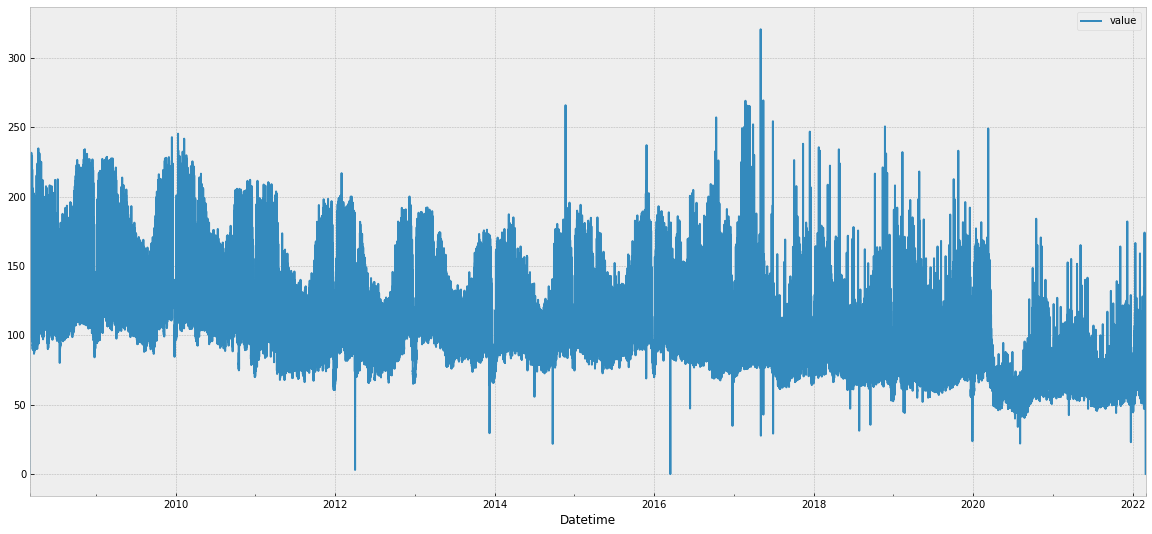

In [5]:
df.plot()

In [6]:
df1 = data.resample(rule='d').sum()

df1.head()

,value
Datetime,
2008-03-03,2401.768
2008-03-04,3799.027
2008-03-05,3874.801
2008-03-06,3799.476
2008-03-07,3738.969


<AxesSubplot:xlabel='Datetime'>

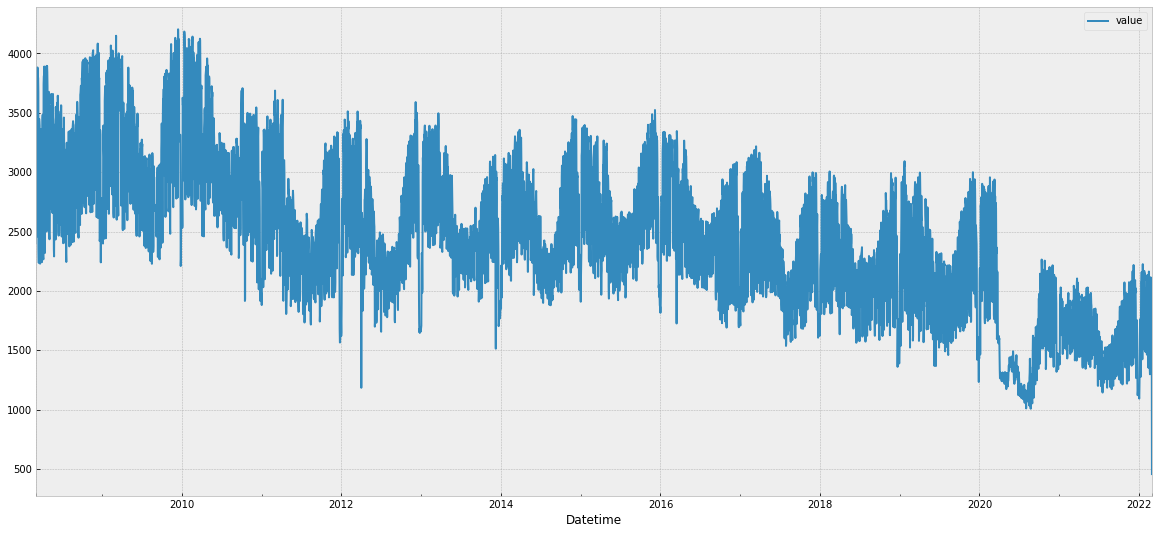

In [7]:
df1.plot()

In [20]:
df['value_next_day'] = df['value'].shift(-1)

In [21]:
df = df.dropna(how='any', axis=0)

df.tail()

,value,value_next_day
Datetime,,
2022-02-24,2095.00,2090.00
2022-02-25,2090.00,1464.25
2022-02-26,1464.25,1334.00
2022-02-27,1334.00,1866.25
2022-02-28,1866.25,457.50


In [22]:
y_true = df['value']
y_pred = df['value_next_day']

In [24]:
from sklearn.metrics import *

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MSE: ', mean_squared_error(y_true, y_pred))
print('MAE: ', mean_absolute_error(y_true, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred))
print('R2: ', r2_score(y_true, y_pred)*100)

RMSE:  394.42197852660007
MSE:  155568.6971448378
MAE:  239.80412248092352
MAPE:  0.10117793904323033
R2:  64.42296743771652
